In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
def get_member_list(ticker='0001.HK'):
    url=f'https://finance.yahoo.com/quote/{ticker}/profile/'
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    r=requests.get(url, headers=headers)
    df=pd.read_html(r.text, attrs = {"class":'svelte-mj92za'})[0]
    member=df['Name'].to_list()

    soup = BeautifulSoup(r.text, 'html.parser')
    company=soup.find('h1', {'class': 'svelte-3a2v0c'}).text
    return (company, member)


In [10]:
china_bank_hkse_stocks = [
    "3988.HK",  # Bank of China Limited
    "0939.HK",  # China Construction Bank Corporation
    "3328.HK",  # Bank of Communications Co., Ltd.
    "2628.HK",  # China Life Insurance Company Limited
    "1398.HK",  # Industrial and Commercial Bank of China Limited
    "3968.HK",  # China Merchants Bank Co., Ltd.
    "1288.HK",  # Agricultural Bank of China Limited
    "2388.HK",  # BOC Hong Kong (Holdings) Limited
]

data=[get_member_list(bank) for bank in china_bank_hkse_stocks]

/var/folders/6v/7gn8h4gn4cg1j7my18cmr5340000gn/T/ipykernel_66510/1812631573.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(r.text, attrs = {"class":'svelte-mj92za'})[0]
/var/folders/6v/7gn8h4gn4cg1j7my18cmr5340000gn/T/ipykernel_66510/1812631573.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(r.text, attrs = {"class":'svelte-mj92za'})[0]
/var/folders/6v/7gn8h4gn4cg1j7my18cmr5340000gn/T/ipykernel_66510/1812631573.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(r.text, attrs = {"class":'svelte-mj92za'})[0]
/var/folders/6v/7gn8h4gn4cg1j7my18cmr5340000gn/T/ipyker

In [22]:
G=nx.Graph()
for node in data:
    company=node[0]
    G.add_nodes_from([(company, {'type': 'company'})])
    for member in node[1]:
        G.add_nodes_from([(member, {'type': 'member'})])
        G.add_edge(company, member)

weight={node[0]:1 if node[1]['type']=='member' else 10 for node in G.nodes(data=True)}
nx.set_node_attributes(G, weight ,'weight')

78.0


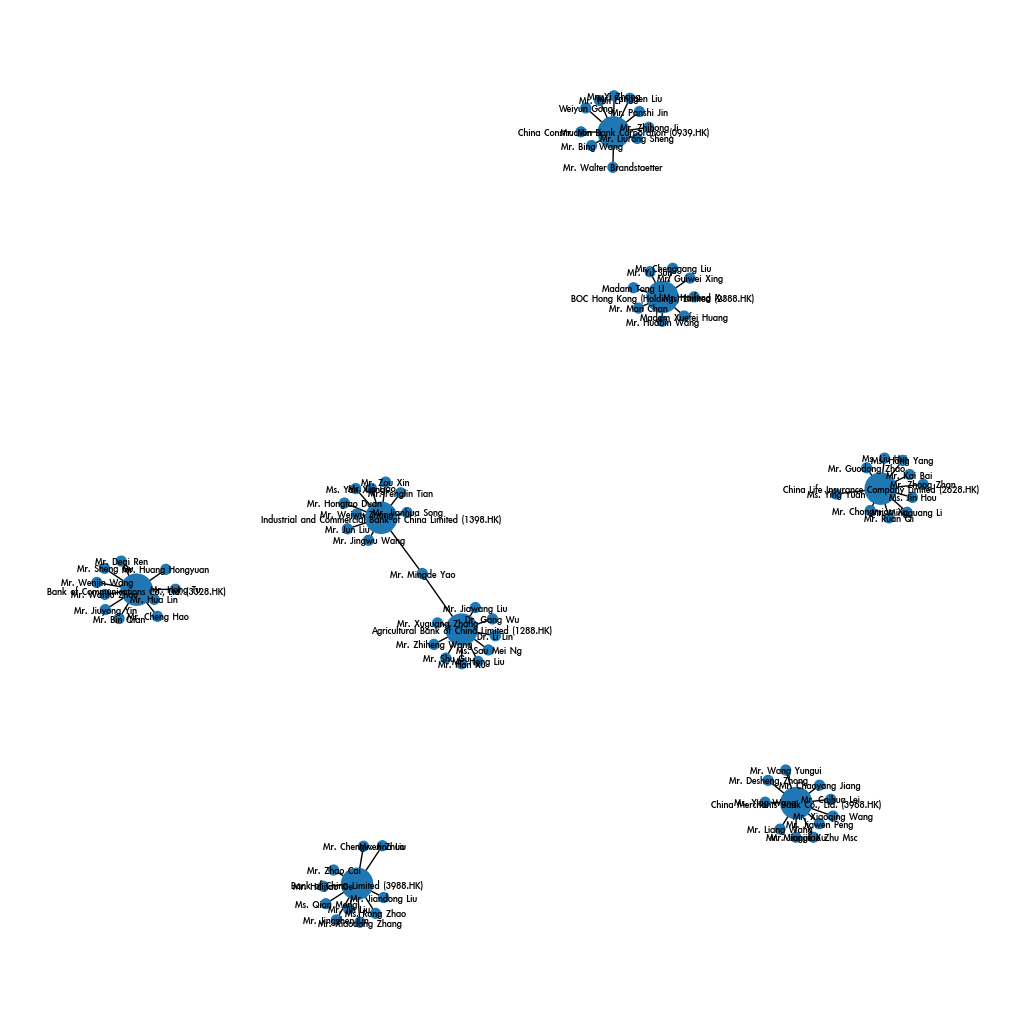

In [27]:
plt.rcParams['font.sans-serif']='Apple LiGothic'
print(G.size(weight="weight"))
plt.figure(3,figsize=(10,10)) 
nx.draw_spring(G, with_labels=True, node_size=[i*50 for i in nx.get_node_attributes(G,'weight').values()] ,font_size=8)